In [2]:
import json
import math
from typing import List

import bitarray
from hashlib import sha3_256, sha256, blake2b

class BloomFilter:
    def __init__(self, size=10**7, hash_function_number=3):
        self.size = size
        self.hash_function_number = hash_function_number
        self.array = self.add_words()

    def add_words(self):
        array = bitarray.bitarray(self.size)
        array.setall(0)
        if self.hash_function_number == 1:
            with open("words.txt") as f:
                for line in f:
                    word = line.strip()
                    index_1 = self.my_hash(word)
                    array[index_1] = 1
        elif self.hash_function_number == 2:
            with open("words.txt") as f:
                for line in f:
                    word = line.strip()
                    index_1 = self.my_hash(word)
                    array[index_1] = 1
                    index_2 = self.my_hash2(word)
                    array[index_2] = 1
        elif self.hash_function_number == 3:
            with open("words.txt") as f:
                for line in f:
                    word = line.strip()
                    index_1 = self.my_hash(word)
                    array[index_1] = 1
                    index_2 = self.my_hash2(word)
                    array[index_2] = 1
                    index_3 = self.my_hash3(word)
                    array[index_3] = 1
        else:
            raise ValueError("Unexpected hash_function_number")
        return array

    def find_word(self, word: str) -> bool:
        if self.hash_function_number == 1:
            index_word_1 = self.my_hash(word)
            if self.array[index_word_1] == 1:
                return True
            else:
                return False
        elif self.hash_function_number == 2:
            index_word_1 = self.my_hash(word)
            index_word_2 = self.my_hash2(word)
            if self.array[index_word_1] == 1 and self.array[index_word_2] == 1:
                return True
            else:
                return False
        elif self.hash_function_number == 3:
            index_word_1 = self.my_hash(word)
            index_word_2 = self.my_hash2(word)
            index_word_3 = self.my_hash3(word)
            if self.array[index_word_1] == 1 and self.array[index_word_2] == 1 and self.array[index_word_3] == 1:
                return True
            else:
                return False
        else:
            raise ValueError("Unexpected hash_function_number")

    def suggest(self, typo: str) -> List[str]:
        # substitute 1 letter in the typo
        sub_list = []
        letters = 'abcdefghijklmnopqrstuvwxyz'
        for i in range(len(typo)):
            if typo[i] in letters:
                for letter in letters:
                    # use string adding
                    sub = typo[:i] + letter + typo[i+1:]
                    sub_list.append(sub)

        # print(sub_list)
        # After substitution, check word in bitarray or not
        suggestions = []
        for s in sub_list:
            if self.find_word(s):
                suggestions.append(s)
        return suggestions

    def my_hash(self, s: str):
        return int(sha256(s.lower().encode()).hexdigest(), 16) % self.size

    def my_hash2(self, s: str):
        return int(blake2b(s.lower().encode()).hexdigest(), 16) % self.size

    def my_hash3(self, s: str):
        return int(sha3_256(s.lower().encode()).hexdigest(), 16) % self.size


class Solution():
    def __init__(self):
        self.data = []
        with open('typos.json', 'r') as f:
            self.data = json.load(f)

        # self.real_words = set()
        # with open('words.txt') as f:
        #     for line in f:
        #         self.real_words.add(line.strip())

        print("solution running...")

    def solve(self):
        from multiprocessing import Process
        process_list = []
        for size in [10**5, 5*10**5, 10**6, 5*10**6, 10**7, 5*10**7, 10**8, 5*10**8, 10**9]:
            for hash_num in [1, 2, 3]:
                p = Process(target=self.solve_this_condition, args=(size, hash_num))
                p.start()
                process_list.append(p)
        for p in process_list:
            p.join()

    def solve_this_condition(self, size, hash_num):
        total_suggest_count = 0
        good_suggest_count = 0
        bf = BloomFilter(size=size, hash_function_number=hash_num)
        for d in self.data:
            typo, truth = d[0], d[1]
            if typo != truth:
                suggestion = bf.suggest(typo)
                total_suggest_count += 1
                if truth in suggestion and len(suggestion) <= 3:
                    good_suggest_count += 1
        good_suggestion_rate = good_suggest_count / total_suggest_count
        print(
            f"given size = {size} and hash function number = {hash_num}, good suggestion rate = {good_suggestion_rate}")

if __name__ == '__main__':
    # self check
    bf = BloomFilter(hash_function_number=1)
    bf.add_words()
    assert bf.suggest("floeer") == ['bloeer', 'qloeer', 'fyoeer', 'flofer', 'floter', 'flower', 'floeqr', 'floees']
    bf = BloomFilter(hash_function_number=2)
    assert bf.suggest("floeer") == ['fyoeer', 'floter', 'flower']
    bf = BloomFilter(hash_function_number=3)
    assert bf.suggest("floeer") == ['floter', 'flower']
    print("self check passed")
    Solution().solve()



self check passed
solution running...
given size = 5000000 and hash function number = 1, good suggestion rate = 0.0
given size = 50000000 and hash function number = 1, good suggestion rate = 0.54512
given size = 10000000 and hash function number = 1, good suggestion rate = 0.00516
given size = 1000000 and hash function number = 1, good suggestion rate = 0.0
given size = 500000 and hash function number = 1, good suggestion rate = 0.0
given size = 1000000000 and hash function number = 1, good suggestion rate = 0.94468
given size = 100000 and hash function number = 1, good suggestion rate = 0.0
given size = 100000000 and hash function number = 1, good suggestion rate = 0.81408
given size = 500000000 and hash function number = 1, good suggestion rate = 0.93992
given size = 50000000 and hash function number = 2, good suggestion rate = 0.94648
given size = 10000000 and hash function number = 2, good suggestion rate = 0.62756
given size = 100000000 and hash function number = 2, good suggestio

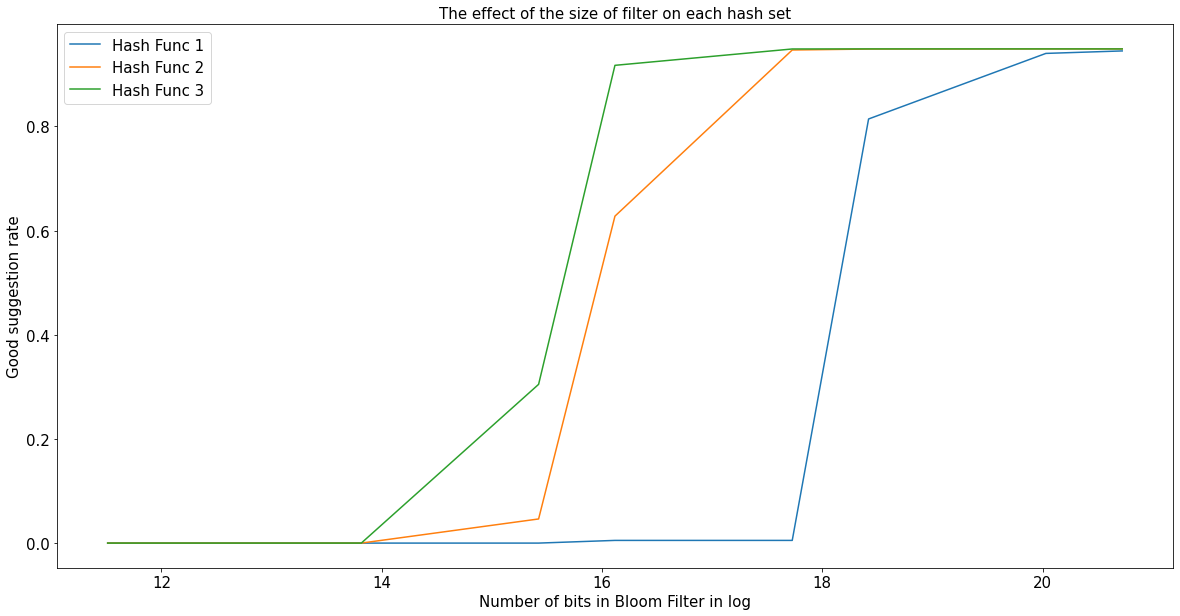

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x=[10**5, 5*10**5, 10**6, 5*10**6, 10**7, 5*10**7, 10**8, 5*10**8, 10**9]
y1=[0.0,0.0,0.0,0.0,0.00516,0.00516,0.81408,0.93992,0.94468]
y2=[0.0,0.0,0.0,0.04632,0.62756,0.94648,0.94828,0.94856,0.94856]
y3=[0.0,0.0,0.0,0.30468,0.91704,0.94844,0.94856,0.94856,0.94856]
plt.figure(figsize=(20,10))
plt.plot(np.log(x), y1,label='Hash Func 1')
plt.plot(np.log(x), y2,label='Hash Func 2')
plt.plot(np.log(x), y3,label='Hash Func 3')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Number of bits in Bloom Filter in log', fontsize=15)
plt.ylabel('Good suggestion rate', fontsize=15)
plt.title('The effect of the size of filter on each hash set', fontsize=15)
plt.show()